In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [16]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras_preprocessing import image
from keras_preprocessing.image import img_to_array



img_dir = 'helmet_generation'  # 이미지가 들어있는 폴더 경로
img_width = 64  # 이미지 가로 길이
img_height = 64  # 이미지 세로 길이

# 이미지를 numpy array로 변환
def img_to_np_array(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = img_to_array(img)
    return x

# 이미지 경로와 라벨을 읽어들임
image_paths = []
labels = []
for subdir, _, files in os.walk(img_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        if img_path.endswith(".png"):
            label = img_path.split("/")[-1]  # 폴더 이름을 라벨로 사용
            image_paths.append(img_path)
            labels.append(label)

# 이미지를 numpy array로 변환
X = np.array([img_to_np_array(img_path) for img_path in image_paths])
y = np.array(labels)

# train/test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y_train

array(['helmet_generation\\Without_Helmet\\withoutnoiseAdded_7776.png',
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_1785.png',
       'helmet_generation\\Without_Helmet\\withoutrotated_7174.png', ...,
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_6442.png',
       'helmet_generation\\Without_Helmet\\withoutinverted_3287.png',
       'helmet_generation\\With_Helmet\\withnoiseAdded_7811.png'],
      dtype='<U59')

In [20]:
# Without_Helmet에 해당하는 파일은 0, With_Helmet에 해당하는 파일은 1로 바꿔줌
y_train = np.array([0 if 'Without_Helmet' in label else 1 for label in y_train])
y_test = np.array([0 if 'Without_Helmet' in label else 1 for label in y_test])

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu' ))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Epoch 1/10
375/375 [==============================] - 7s 10ms/step - loss: 15.5168 - accuracy: 0.7607 - val_loss: 0.3545 - val_accuracy: 0.8457
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2533 - accuracy: 0.8964 - val_loss: 0.2372 - val_accuracy: 0.9097
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1175 - accuracy: 0.9564 - val_loss: 0.2192 - val_accuracy: 0.9240
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0563 - accuracy: 0.9804 - val_loss: 0.2523 - val_accuracy: 0.9388
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.2739 - val_accuracy: 0.9348
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0508 - accuracy: 0.9852 - val_loss: 0.2920 - val_accuracy: 0.9388
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.3364 - val_accuracy: 0.933

In [23]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

#테스트 정확도 출력
print('\n test acc: %.4f' %(model.evaluate(X_test, y_test)[1])) 

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0298 - accuracy: 0.9919 - val_loss: 0.3373 - val_accuracy: 0.9457
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.3108 - val_accuracy: 0.9490
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.3207 - val_accuracy: 0.9440
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.4483 - val_accuracy: 0.9445
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.3555 - val_accuracy: 0.9530
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.3224 - val_accuracy: 0.9580
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.8086e-04 - accuracy: 1.0000 - val_loss: 0.3442 - val_accuracy: 0.

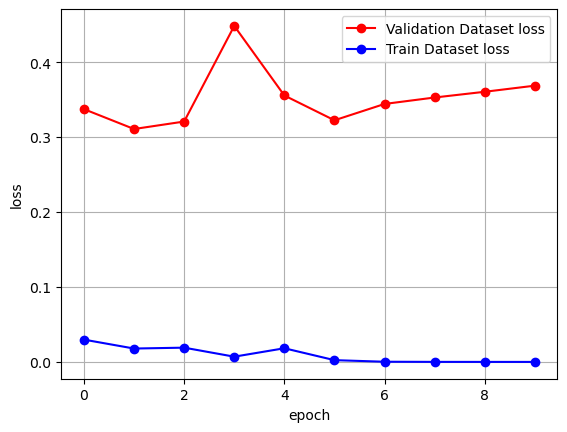

In [25]:
#학습용 데이터 셋/검증 셋 오차 저장

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Validation Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()